Para este problema, es necesario utilizar la tercera derivada que de igual forma que se ha obtenido la segunda derivada se puede calcular.

$$\frac{d^3}{dx^3}f(x)=\frac{1}{h^3}(f(x+3h/2)-3f(x+h/2)+3f(x-h/2)-f(x-3h/2))$$


In [ ]:
from numpy import *

def f1(x,n):
  return (1-x**2)**(n+1/2)

def d1(g,x,h):                         # 1era Derivada
  return (1/h)*(g(x+h/2,1)-g(x-h/2,1)) # 'n' de la función igual a 1 debido a la forma de las funciones de Chebyshev

def d2(g,x,h):                         # 2da derivada
  return (1/h**2)*(g(x+h,2)-2*g(x,2)+g(x-h,2))

def d3(g,x,h):                         #3er derivada
  return (1/h**3)*(g(x+3*h/2,3)-3*g(x+h/2,3)+3*g(x-h/2,3)-g(x-3*h/2,3))


# Polinomios de Chebyshev n= 1, 2 y 3
def c1(x):
  return 2*x

def c2(x):
  return 4*x**2-1

def c3(x):
  return 8*x**3-4*x

# Calculo numerico

def U(x,n,h):
  DobFac=prod(arange(2*n+1,0,-2))
  U=(((-1)**n*(n+1))/(DobFac*sqrt(1-x**2)))
  if n==1:
    U*=d1(f1,x,h)
  elif n==2:
    U*=d2(f1,x,h)
  else:
    U*=d3(f1,x,h)
  return U

def ErrRel(x,n,h):
  if n==1:
    return abs(U(x,n,h)-c1(x))*100/abs(c1(x))
  elif n==2:
    return abs(U(x,n,h)-c2(x))*100/abs(c2(x))
  else:
    return abs(U(x,n,h)-c3(x))*100/abs(c3(x))


print("Resultados numericos de los polinomios de Chebyshev en x=0.5 para un h=0.01\t")
for n in range (1,4):
  print(f"n= {n}, U= {U(0.5,n,0.01)}, er= {ErrRel(0.5,n,0.01)}%")



Resultados numericos de los polinomios de Chebyshev en x=0.5 para un h=0.01	
n= 1, U= 0.9999814812345608, er= 0.0018518765439234919%
n= 2, U= 2.221827136988064e-05, er= inf%
n= 3, U= -0.9997111377547514, er= 0.028886224524860005%


<ipython-input-45-9b4a9eeda96c>:43: RuntimeWarning: divide by zero encountered in double_scalars
  return abs(U(x,n,h)-c2(x))*100/abs(c2(x))


El segundo polinomio de Chebyshev es 0 en x=0.5 por lo que no se puede calcular un error relativo, solo podemos compararlo con la desviación absoluta que es igual al valor del polinomio calculado numericamente



Text(0.5, 1.0, 'Polinomios de Chebyshev')

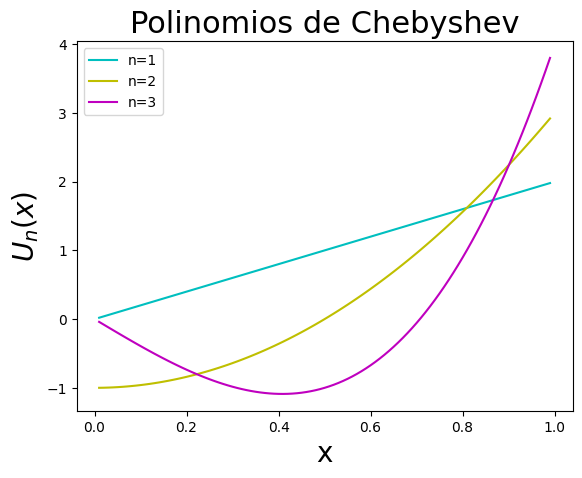

In [ ]:
x=0.01*arange(1,100)
y3,y2,y1=U(x,3,0.001),U(x,2,0.001),U(x,1,0.001) # h=0.001, si es igual a 0.01 se evaluaria sobre un punto singular de la función

import matplotlib.pyplot as plt

plt.plot(x,y1, 'c', label="n=1")
plt.plot(x,y2, 'y', label="n=2")
plt.plot(x,y3, 'm', label= "n=3")
plt.legend()

plt.xlabel('x', fontsize=20)
plt.ylabel('$U_n(x)$', fontsize=20)
plt.title('Polinomios de Chebyshev', fontsize=22)